In [2]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [3]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [4]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [5]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [6]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


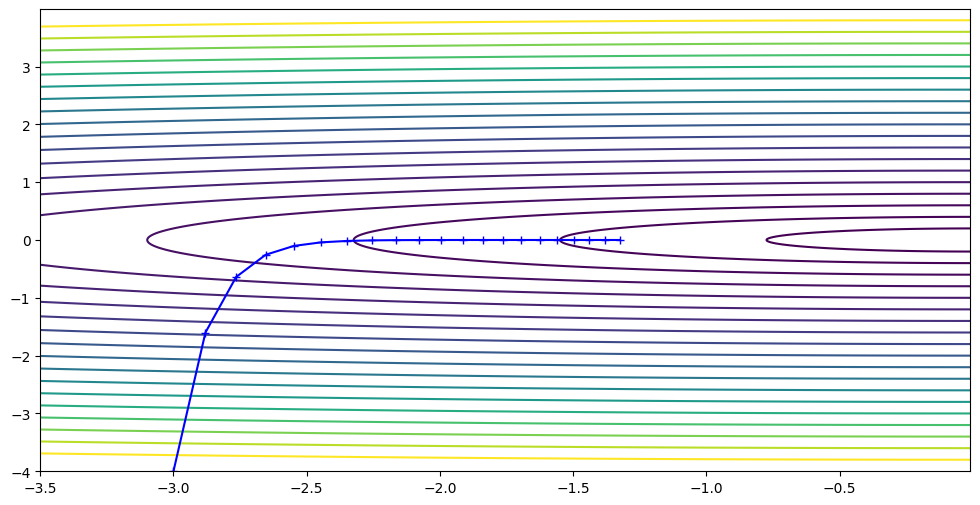

In [7]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


SGD - lr=0.5   0.755, (-0.755,  0.000)
SGD - lr=0.8   0.314, (-0.314, -0.000)
SGD - lr=1   4.004, (-0.171, -4.000)
SGD - lr=1.01   5.946, (-0.166, -5.944)


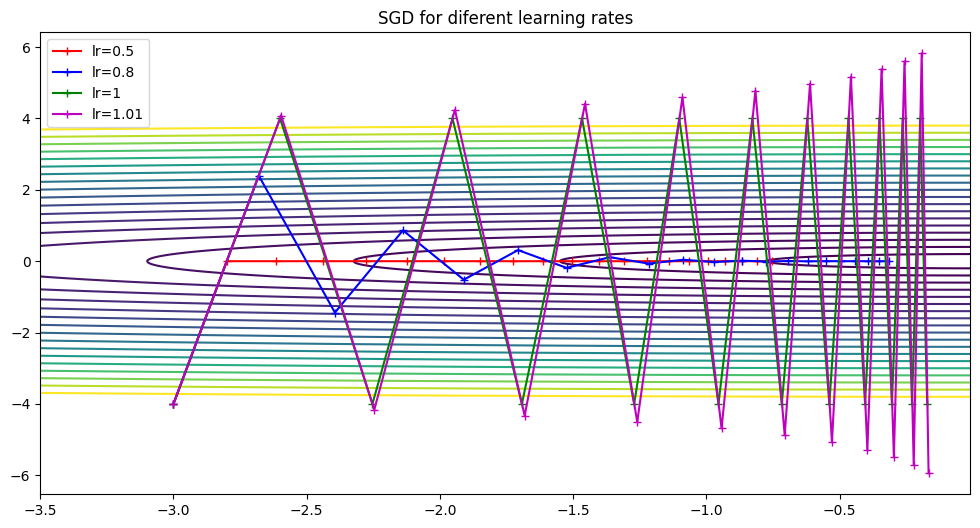

In [20]:
nepochs = 20
lrs = [0.5, 0.8, 1, 1.01]
styles = ['r-+', 'b-+', 'g-+', 'm-+']

plt.figure(1,figsize=(12,6))
plt.title("SGD for diferent learning rates")
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
for i, lr in enumerate(lrs):

    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist, styles[i], label=f"lr={lr}")
    plt.legend()
    print(f"SGD - lr={lr} ", error(xhist,yhist))



As expected SGD converges faster with higher learning rates. If rhe learning rate gets too high however, it does not converge anymore and just oscillates back and forth or even diverges

Mommentum w/o Nesterov- beta = 0.5   0.532, (-0.532, -0.002)
Mommentum w/o Nesterov- beta = 0.8   0.380, ( 0.360,  0.122)
Mommentum w/o Nesterov- beta = 0.9   1.187, ( 0.827,  0.852)
Mommentum w/o Nesterov- beta = 0.95   2.172, ( 1.174,  1.827)


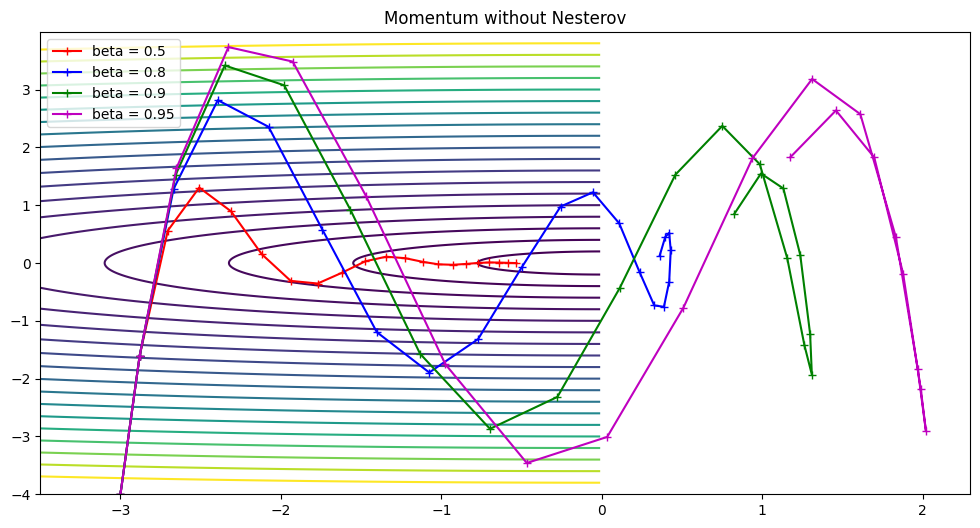

In [15]:
nepochs = 20
lr = 0.3
betas = [0.5, 0.8, 0.9, 0.95]
styles = ['r-+', 'b-+', 'g-+', 'm-+']

plt.figure(1,figsize=(12,6))
plt.title("Momentum without Nesterov")
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
for i, beta in enumerate(betas):

    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=lr, momentum=beta)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist, styles[i], label=f"beta = {beta}")
    plt.legend()
    print(f"Mommentum w/o Nesterov- beta = {beta} ", error(xhist,yhist))

Higher momentum leads to bigger steps, however if beta is too high the function overshoots heavily without Nesterov.

Mommentum with Nesterov- beta = 0.5   0.550, (-0.550,  0.000)
Mommentum with Nesterov- beta = 0.8   0.229, ( 0.229, -0.000)
Mommentum with Nesterov- beta = 0.9   0.542, ( 0.542, -0.000)
Mommentum with Nesterov- beta = 0.95   0.719, ( 0.719, -0.000)


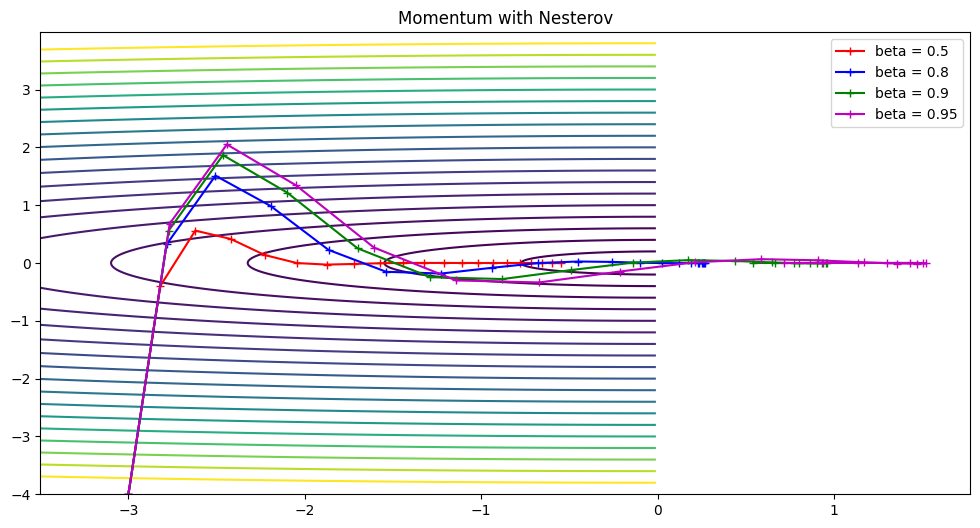

In [21]:
nepochs = 20
lr = 0.3
betas = [0.5, 0.8, 0.9, 0.95]
styles = ['r-+', 'b-+', 'g-+', 'm-+']

plt.figure(1,figsize=(12,6))
plt.title("Momentum with Nesterov")
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
for i, beta in enumerate(betas):

    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=lr, momentum=beta, nesterov=True)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist, styles[i], label=f"beta = {beta}")
    plt.legend()
    print(f"Mommentum with Nesterov- beta = {beta} ", error(xhist,yhist))

The before observed overshooting is less severe when using Momentum with Nesterov. It still does overshoot a little in one direction.

RMSprop - beta = 0.5   0.293, ( 0.293, -0.003)
RMSprop - beta = 0.8   0.020, (-0.000, -0.020)
RMSprop - beta = 0.9   0.017, (-0.000, -0.017)
RMSprop - beta = 0.95   0.002, (-0.000, -0.002)
RMSprop - beta = 0.99   0.000, ( 0.000, -0.000)


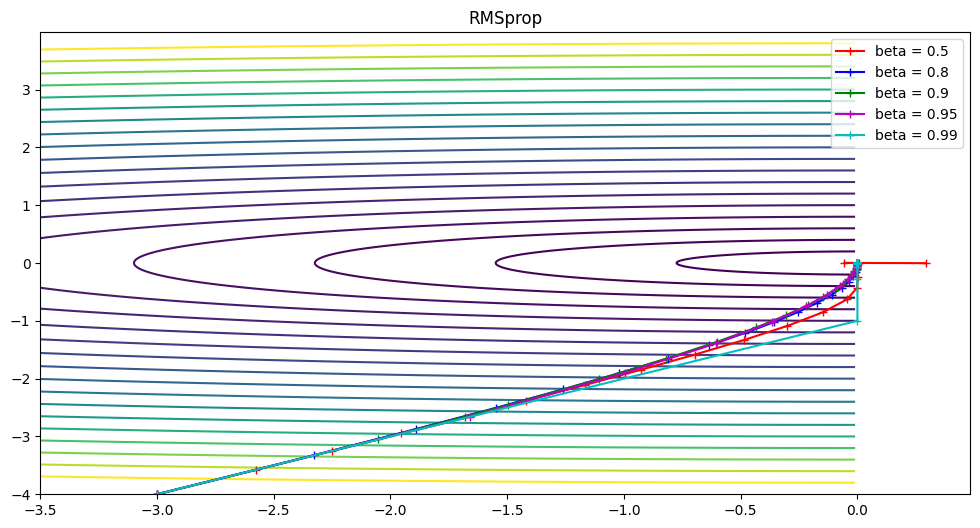

In [23]:
nepochs = 20
lr = 0.3
betas = [0.5, 0.8, 0.9, 0.95, 0.99]
styles = ['r-+', 'b-+', 'g-+', 'm-+', 'c-+']

plt.figure(1,figsize=(12,6))
plt.title("RMSprop")
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
for i, beta in enumerate(betas):

    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.RMSprop([x],lr=lr, alpha = beta, centered=False)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist, styles[i], label=f"beta = {beta}")
    plt.legend()
    print(f"RMSprop - beta = {beta} ", error(xhist,yhist))

The choice of beta makes little difference in the path. Choosing it too low however causes some oscillations around the optimum. Higher betas cause faster convergence.

RMSprop - beta = [0.4, 0.7]   0.001, ( 0.001,  0.000)
RMSprop - beta = [0.5, 0.8]   0.006, ( 0.002,  0.005)
RMSprop - beta = [0.8, 0.9]   0.301, (-0.072,  0.292)
RMSprop - beta = [0.9, 0.99]   1.020, ( 0.533,  0.870)


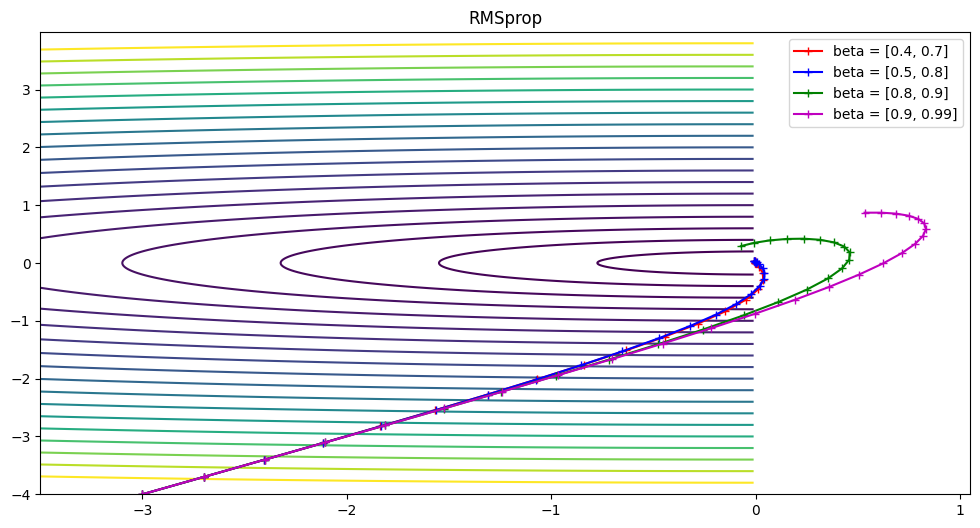

In [42]:
nepochs = 25
lr = 0.3
betas = [[0.4, 0.7], [0.5, 0.8], [0.8,0.9] , [0.9, 0.99]]
styles = ['r-+', 'b-+', 'g-+', 'm-+', 'c-+']

plt.figure(1,figsize=(12,6))
plt.title("RMSprop")
plot_contours([-3.5,0.,-4.,4.], 4., test_function)
for i, beta in enumerate(betas):

    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.Adam([x],lr=lr, betas = beta)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist, styles[i], label=f"beta = {beta}")
    plt.legend()
    print(f"RMSprop - beta = {beta} ", error(xhist,yhist))